<a href="https://colab.research.google.com/github/who0liebo0lie/GNN-Molecular-Tutorial-/blob/main/GNN%20Molecular%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s e

Extracting /content/data/QM9/raw/qm9_v3.zip
Processing...
Using a pre-processed version of the dataset. Please install 'rdkit' to alternatively process the raw data.
Done!


Dataset loaded in 76.1 seconds
Train size: 15000, Test size: 2000
Batch size: 32
Number of features: 11
Model parameters: 134,913
Using device: cpu

Starting training...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 000 | Train: 1.9217 | Test: 2.0924 | Time: 23.1s | ETA: 11.1min | LR: 0.00200
Epoch 005 | Train: 1.5987 | Test: 1.9145 | Time: 23.9s | ETA: 9.4min | LR: 0.00200
Epoch 010 | Train: 1.4959 | Test: 1.7640 | Time: 24.6s | ETA: 7.6min | LR: 0.00200
Epoch 015 | Train: 1.4390 | Test: 1.7614 | Time: 24.4s | ETA: 5.6min | LR: 0.00200
Epoch 020 | Train: 1.4234 | Test: 1.9075 | Time: 24.5s | ETA: 3.6min | LR: 0.00200
Epoch 025 | Train: 1.3746 | Test: 1.7667 | Time: 23.8s | ETA: 1.6min | LR: 0.00100
Epoch 029 | Train: 1.3600 | Test: 1.6748 | Time: 24.3s | ETA: 0.0min | LR: 0.00100
Training completed in 12.11 minutes
Best Test Loss: 1.6748


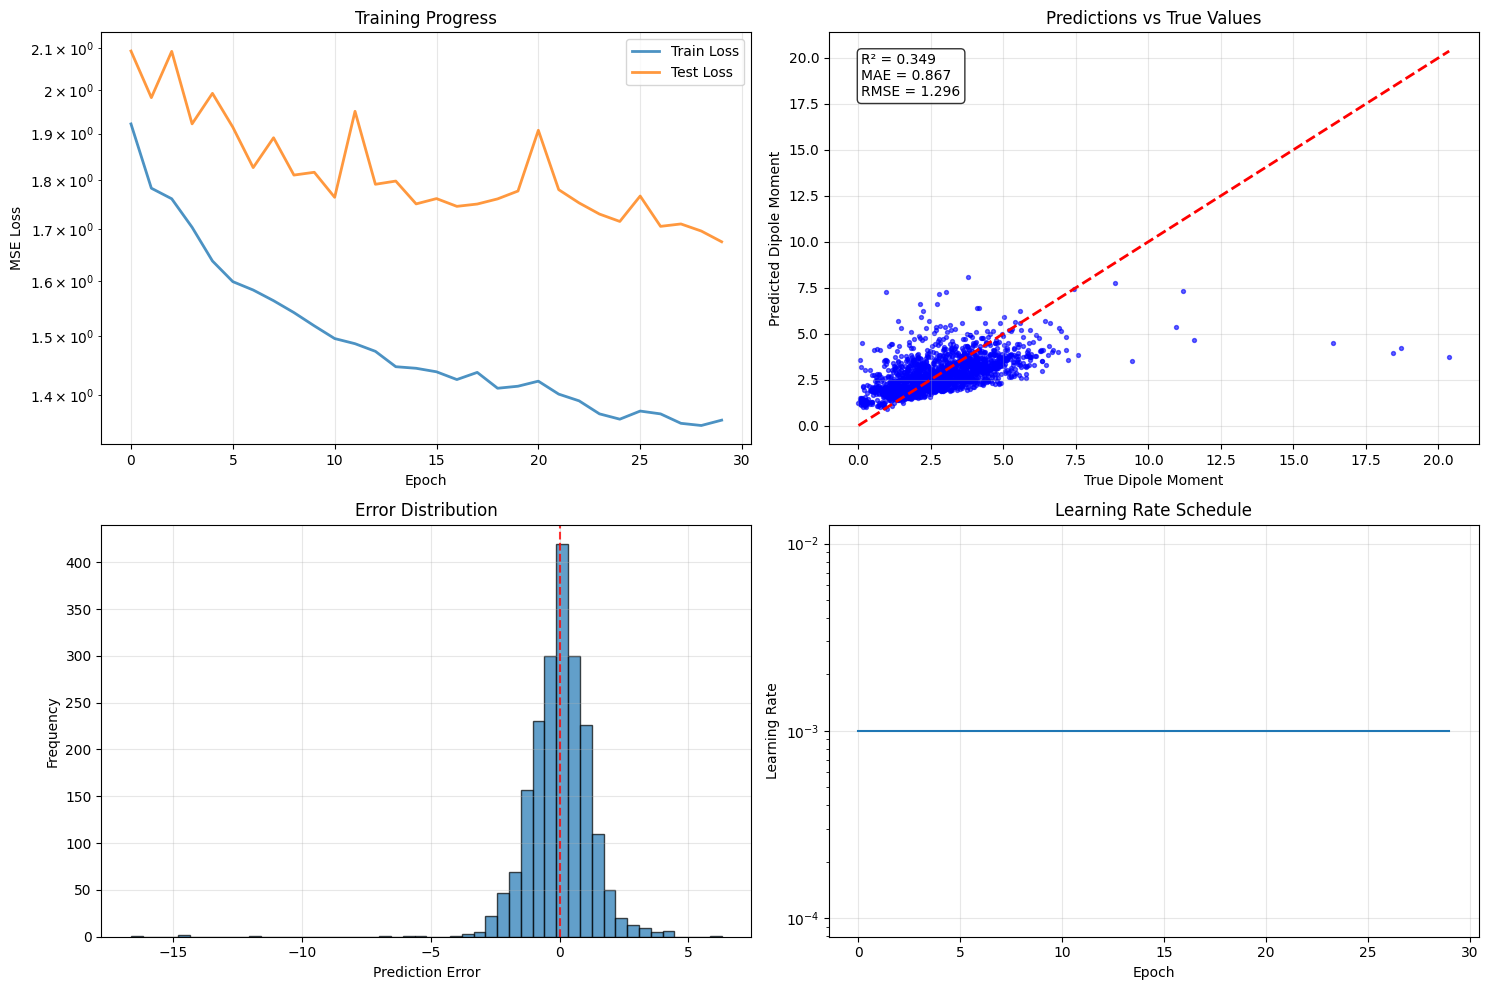


PERFORMANCE SUMMARY
Final Train Loss: 1.360036
Final Test Loss: 1.674826
Best Test Loss: 1.674826
R² Score: 0.3488
Mean Absolute Error: 0.8672
Root Mean Square Error: 1.2958
Total Training Time: 12.11 minutes
Average Time per Epoch: 24.2 seconds

Sample Predictions:


<ipython-input-1-1356174220>:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/best_gnn_model.pt"))


Molecule 1: Pred=+2.4427, True=+1.5274, Error=0.9153
Molecule 2: Pred=+1.3929, True=+0.0709, Error=1.3220
Molecule 3: Pred=+1.6271, True=+1.7187, Error=0.0916
Molecule 4: Pred=+1.8075, True=+1.4439, Error=0.3636
Molecule 5: Pred=+2.6580, True=+2.0672, Error=0.5908

Model saved locally as 'best_gnn_model.pt'
TRAINING COMPLETED SUCCESSFULLY! 🎉


In [1]:
# GNN for Molecular Property Prediction - Google Colab Optimized
# This notebook is optimized for Google Colab with GPU acceleration

# Install required packages (Colab-specific)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install torch-geometric

# Check GPU availability
import torch
import torch.nn.functional as F
from torch_geometric.datasets import QM9
from torch_geometric.transforms import AddSelfLoops
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import matplotlib.pyplot as plt
import numpy as np
import time

print("="*50)
print("SYSTEM INFO")
print("="*50)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print("WARNING: No GPU detected. Training will be slow.")
print("="*50)

# Define the GCN Model (Optimized for Colab)
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.dropout = torch.nn.Dropout(0.3)  # Reduced dropout for faster convergence
        self.lin = torch.nn.Linear(hidden_channels, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # Graph convolutions with residual-like connections
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)

        x = F.relu(self.conv2(x, edge_index))
        x = self.dropout(x)

        x = F.relu(self.conv3(x, edge_index))

        # Global pooling
        x = global_mean_pool(x, batch)

        return self.lin(x)

# Load QM9 Dataset with progress tracking
print("Loading QM9 dataset...")
start_time = time.time()

dataset = QM9(root='/content/data/QM9', transform=AddSelfLoops())
dataset = dataset.shuffle()

load_time = time.time() - start_time
print(f"Dataset loaded in {load_time:.1f} seconds")

# Dataset split (optimized sizes for Colab)
train_size = 15000  # Increased for better performance
test_size = 2000
train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:train_size + test_size]

# Data loaders (optimized batch size for Colab GPU)
batch_size = 128 if torch.cuda.is_available() else 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                         num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=2, pin_memory=True)

print(f'Train size: {len(train_dataset)}, Test size: {len(test_dataset)}')
print(f'Batch size: {batch_size}')
print(f'Number of features: {dataset.num_features}')

# Initialize model with Colab-optimized settings
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(num_features=dataset.num_features, hidden_channels=256).to(device)  # Larger model for GPU
optimizer = torch.optim.AdamW(model.parameters(), lr=0.002, weight_decay=1e-4)  # AdamW for better performance
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)
criterion = torch.nn.MSELoss()

print(f'Model parameters: {sum(p.numel() for p in model.parameters()):,}')
print(f'Using device: {device}')

# Training function with progress tracking
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device, non_blocking=True)
        optimizer.zero_grad()
        out = model(batch)
        loss = criterion(out, batch.y[:, 0:1])  # Predicting dipole moment (mu)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Testing function
def test():
    model.eval()
    total_loss = 0
    predictions = []
    targets = []

    with torch.no_grad():
        for batch in test_loader:
            batch = batch.to(device, non_blocking=True)
            out = model(batch)
            loss = criterion(out, batch.y[:, 0:1])
            total_loss += loss.item()

            predictions.extend(out.cpu().numpy())
            targets.extend(batch.y[:, 0:1].cpu().numpy())

    return total_loss / len(test_loader), predictions, targets

# Training loop with time tracking
print("\nStarting training...")
print("="*50)

train_losses = []
test_losses = []
best_test_loss = float('inf')
num_epochs = 30  # Reduced epochs for Colab session limits

training_start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    train_loss = train()
    test_loss, predictions, targets = test()

    scheduler.step(test_loss)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    epoch_time = time.time() - epoch_start

    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(model.state_dict(), "/content/best_gnn_model.pt")

    # Progress update every 5 epochs
    if epoch % 5 == 0 or epoch == num_epochs - 1:
        current_lr = optimizer.param_groups[0]['lr']
        total_time = time.time() - training_start_time
        eta = (total_time / (epoch + 1)) * (num_epochs - epoch - 1)

        print(f"Epoch {epoch:03d} | Train: {train_loss:.4f} | Test: {test_loss:.4f} | "
              f"Time: {epoch_time:.1f}s | ETA: {eta/60:.1f}min | LR: {current_lr:.5f}")

total_training_time = time.time() - training_start_time
print("="*50)
print(f"Training completed in {total_training_time/60:.2f} minutes")
print(f"Best Test Loss: {best_test_loss:.4f}")

# Visualizations (Colab-optimized)
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training curves
axes[0, 0].plot(train_losses, label='Train Loss', linewidth=2, alpha=0.8)
axes[0, 0].plot(test_losses, label='Test Loss', linewidth=2, alpha=0.8)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('MSE Loss')
axes[0, 0].set_title('Training Progress')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

# Predictions vs targets
predictions = np.array(predictions).flatten()
targets = np.array(targets).flatten()

axes[0, 1].scatter(targets, predictions, alpha=0.6, s=8, c='blue')
axes[0, 1].plot([targets.min(), targets.max()], [targets.min(), targets.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('True Dipole Moment')
axes[0, 1].set_ylabel('Predicted Dipole Moment')
axes[0, 1].set_title('Predictions vs True Values')
axes[0, 1].grid(True, alpha=0.3)

# Calculate metrics
correlation = np.corrcoef(targets, predictions)[0, 1]
r_squared = correlation ** 2
mae = np.mean(np.abs(targets - predictions))
rmse = np.sqrt(np.mean((targets - predictions) ** 2))

axes[0, 1].text(0.05, 0.95, f'R² = {r_squared:.3f}\nMAE = {mae:.3f}\nRMSE = {rmse:.3f}',
                transform=axes[0, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                verticalalignment='top')

# Error distribution
errors = predictions - targets
axes[1, 0].hist(errors, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Prediction Error')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Error Distribution')
axes[1, 0].axvline(0, color='red', linestyle='--', alpha=0.8)
axes[1, 0].grid(True, alpha=0.3)

# Learning rate schedule
axes[1, 1].plot(range(len(train_losses)), [optimizer.param_groups[0]['lr']] * len(train_losses))
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Learning Rate')
axes[1, 1].set_title('Learning Rate Schedule')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

# Performance summary
print("\n" + "="*50)
print("PERFORMANCE SUMMARY")
print("="*50)
print(f"Final Train Loss: {train_losses[-1]:.6f}")
print(f"Final Test Loss: {test_losses[-1]:.6f}")
print(f"Best Test Loss: {best_test_loss:.6f}")
print(f"R² Score: {r_squared:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Square Error: {rmse:.4f}")
print(f"Total Training Time: {total_training_time/60:.2f} minutes")
print(f"Average Time per Epoch: {total_training_time/num_epochs:.1f} seconds")

# Sample predictions
print(f"\nSample Predictions:")
model.load_state_dict(torch.load("/content/best_gnn_model.pt"))
model.eval()

with torch.no_grad():
    sample_batch = next(iter(test_loader))
    sample_batch = sample_batch.to(device)
    sample_predictions = model(sample_batch)

    for i in range(min(5, len(sample_predictions))):
        pred = sample_predictions[i].item()
        target = sample_batch.y[i, 0].item()
        error = abs(pred - target)
        print(f"Molecule {i+1}: Pred={pred:+.4f}, True={target:+.4f}, Error={error:.4f}")

# Save model to Google Drive (optional)
try:
    from google.colab import drive
    drive.mount('/content/drive')
    torch.save(model.state_dict(), "/content/drive/MyDrive/gnn_molecular_model.pt")
    print(f"\nModel saved to Google Drive!")
except:
    print(f"\nModel saved locally as 'best_gnn_model.pt'")

print("="*50)
print("TRAINING COMPLETED SUCCESSFULLY! 🎉")
print("="*50)